In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)


In [2]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[4]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

dataset_fname = 'bursi.pos.gspan'

In [3]:
%%time
# induce a grammar and train an estimator
training_graphs = get_graphs(dataset_fname, size=300)

from graphlearn.graphlearn import GraphLearnSampler
from eden.graph import Vectorizer
sampler=GraphLearnSampler(radius_list=[0,1], thickness_list=[2],random_state=42447,
                          min_cip_count=2, min_interface_count=2,
                          vectorizer=Vectorizer(5))
#take nu% of data as outlier
sampler.fit(training_graphs, nu=0.25, n_jobs=-1)

print('graph grammar stats:')
n_instances, interface_counts, core_counts, cip_counts = sampler.grammar().size()
print('#instances: %d   #interfaces: %d   #cores: %d   #core-interface-pairs: %d' % (n_instances, interface_counts, core_counts, cip_counts))

sampler.save('tmp/sampler.ge')


fitting was asked with n=1

Classifier:
SGDClassifier(alpha=0.000194550702376, average=False, class_weight=None,
       epsilon=0.1, eta0=0.495920186486, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='log', n_iter=91, n_jobs=1,
       penalty='l1', power_t=0.21854138878, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
#instances: 300  #interfaces: 122   #cores: 54   #core-interface-pairs: 378
graph grammar stats:
#instances: 300   #interfaces: 122   #cores: 54   #core-interface-pairs: 378
Saved model: tmp/sampler.ge
CPU times: user 15.8 s, sys: 1.04 s, total: 16.9 s
Wall time: 37.5 s


In [4]:
%%time
from graphlearn.graphlearn import GraphLearnSampler
sampler=GraphLearnSampler()
sampler.load('tmp/sampler.ge')

# graph sampling
graphs = get_graphs(dataset_fname, size=100)

id_start=34
id_end=id_start+12
from itertools import islice
graphs = islice(graphs,id_start,id_end)

# sample
n_steps=50
n_samples=2

from graphlearn.graphlearn import GraphLearnSampler
graphs = sampler.sample(graphs,
                        n_steps=n_steps, n_samples=n_samples,
                        target_orig_cip=False,
                        probabilistic_core_choice=True,
                        score_core_choice= False,
                        max_core_size_diff=-1,
                        burnin=1,
                        omit_seed=False,
                        max_cycle_size=0,
                        improving_threshold=.8, 
                        improving_linear_start=0.2,
                        accept_static_penalty=0.0,
                        n_jobs=1,
                        select_cip_max_tries=200,
                        keep_duplicates=True,
                       estimate_flowback=True)

Loaded model: tmp/sampler.ge
CPU times: user 400 ms, sys: 48 ms, total: 448 ms
Wall time: 446 ms


WARNING you set estimate backflow. the implementation is a little sketchy so dont try this with weired graphs. 
preprocessing grammar
_sample_notes: None
accept_static_penalty: 0.0
batch_size: 10
    burnin: 1
complexity: 3
estimate_flowback: True
 estimator: CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.000194550702376, average=False, class_weight=None,
       epsilon=0.1, eta0=0.495920186486, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='log', n_iter=91, n_jobs=1,
       penalty='l1', power_t=0.21854138878, random_state=None,
       shuffle=True, verbose=0, warm_start=False),
            cv=2, method='sigmoid')
estimatorobject: <graphlearn.estimatorwrapper.EstimatorWrapper instance at 0x7f659f4b5560>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f659f4b54d0>
generator_mode: False
hash_bitmask: 1048575
improving_linear_start: 10
improving_penalty_per_step: 0.0333333333333
improving_threshold: 40
keep_duplicat

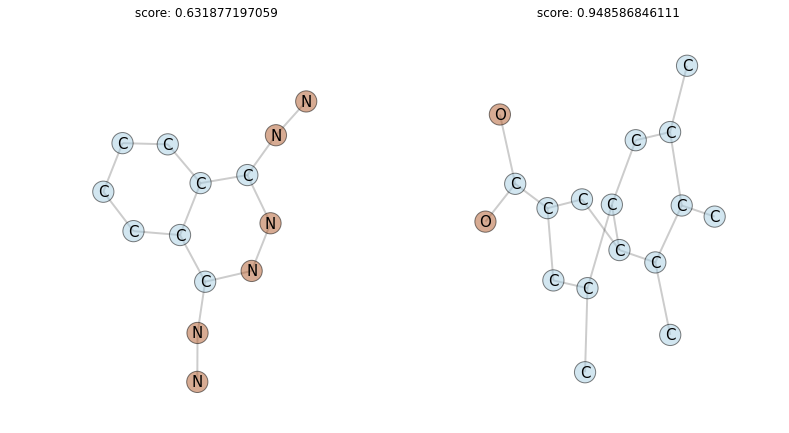

24 19
flow: 1.104314
_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0
16 10
flow: 0.989324
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0
11 3
flow: 1.065574
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0
3 6
flow: 1.057143
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0
12 21
flow: 1.011194
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
10 12
flow: 0.963570
_propose_graph: iteration 5 ; core 0 of 5 ; original_cips tried  0
52 31
flow: 1.116267
_propose_graph: iteration 6 ; core 0 of 7 ; original_cips tried  0
12 14
flow: 1.002853
_propose_graph: iteration 7 ; core 0 of 5 ; original_cips tried  0
38 16
flow: 1.022191
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
1 2
flow: 1.018519
_propose_graph: iteration 9 ; core 0 of 2 ; original_cips tried  0
33 23
flow: 1.102265
_propose_graph: iteration 10 ; core 0 of 2 ; original_cips tried  0
10 5
flow: 1.022099
_propose_graph: 

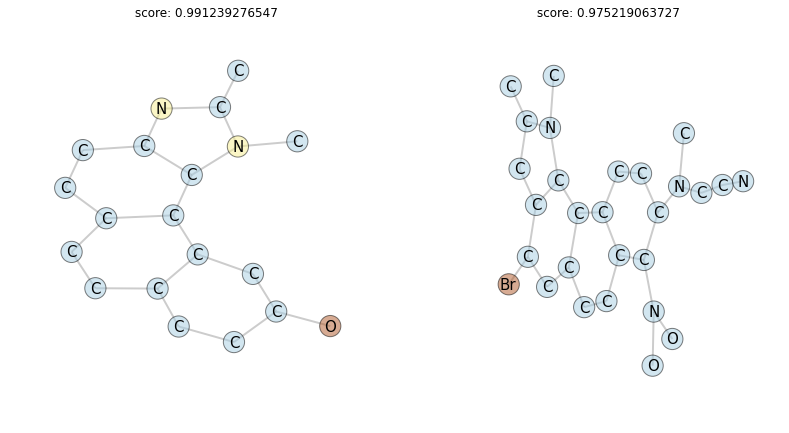

7 11
flow: 0.928571
_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0
8 21
flow: 0.841270
_propose_graph: iteration 1 ; core 0 of 16 ; original_cips tried  0
32 51
flow: 0.760196
_propose_graph: iteration 2 ; core 0 of 14 ; original_cips tried  0
43 27
flow: 1.101313
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0
53 28
flow: 1.207419
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
11 5
flow: 1.053476
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0
23 13
flow: 1.064838
_propose_graph: iteration 6 ; core 0 of 7 ; original_cips tried  0
13 23
flow: 0.939110
_propose_graph: iteration 7 ; core 0 of 7 ; original_cips tried  1
10 27
flow: 0.952038
_propose_graph: iteration 8 ; core 0 of 5 ; original_cips tried  0
8 8
flow: 1.000000
_propose_graph: iteration 9 ; core 0 of 16 ; original_cips tried  0
24 7
flow: 1.038356
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0
29 20
flow: 1.073597
_propose_grap

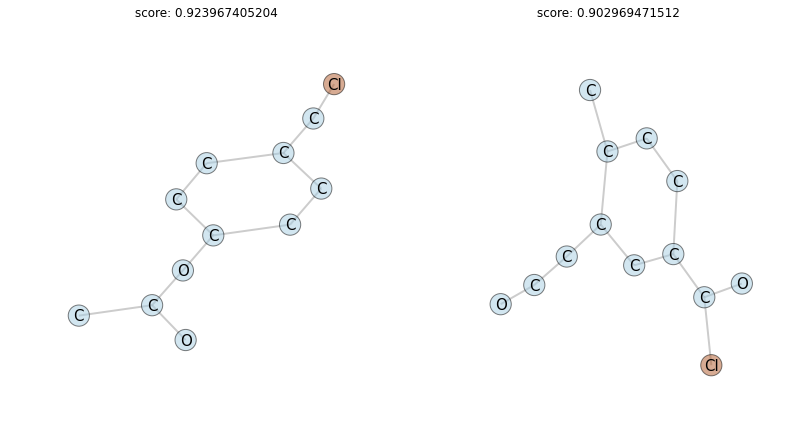

12 10
flow: 0.994505
_propose_graph: iteration 0 ; core 0 of 4 ; original_cips tried  0
26 33
flow: 1.007684
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0
10 10
flow: 0.939394
_propose_graph: iteration 2 ; core 0 of 4 ; original_cips tried  0
50 35
flow: 1.193548
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0
23 18
flow: 0.992852
_propose_graph: iteration 4 ; core 0 of 3 ; original_cips tried  0
7 24
flow: 1.092575
_propose_graph: iteration 5 ; core 0 of 5 ; original_cips tried  0
36 1
flow: 0.948830
_propose_graph: iteration 6 ; core 0 of 7 ; original_cips tried  0
12 12
flow: 1.000000
_propose_graph: iteration 7 ; core 0 of 5 ; original_cips tried  0
19 19
flow: 1.052632
_propose_graph: iteration 8 ; core 0 of 5 ; original_cips tried  0
1 1
flow: 1.000000
_propose_graph: iteration 9 ; core 0 of 7 ; original_cips tried  0
15 13
flow: 0.996683
_propose_graph: iteration 10 ; core 0 of 4 ; original_cips tried  0
14 13
flow: 0.851986
_propose_graph

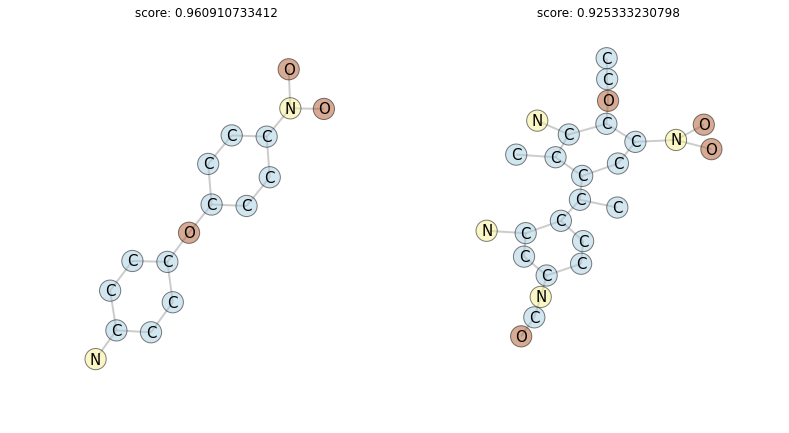

14 24
flow: 0.858696
_propose_graph: iteration 0 ; core 0 of 7 ; original_cips tried  0
39 19
flow: 1.039297
_propose_graph: iteration 1 ; core 0 of 7 ; original_cips tried  0
39 27
flow: 1.046512
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0
16 8
flow: 1.035714
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  1
3 1
flow: 0.968254
_propose_graph: iteration 4 ; core 0 of 16 ; original_cips tried  0
14 39
flow: 0.972576
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0
22 43
flow: 0.964067
_propose_graph: iteration 6 ; core 0 of 3 ; original_cips tried  0
19 14
flow: 1.105172
_propose_graph: iteration 7 ; core 0 of 7 ; original_cips tried  0
14 11
flow: 1.044990
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
30 18
flow: 1.036364
_propose_graph: iteration 9 ; core 0 of 7 ; original_cips tried  0
2 3
flow: 1.098214
_propose_graph: iteration 10 ; core 0 of 16 ; original_cips tried  0
18 30
flow: 0.967914
_propose_grap

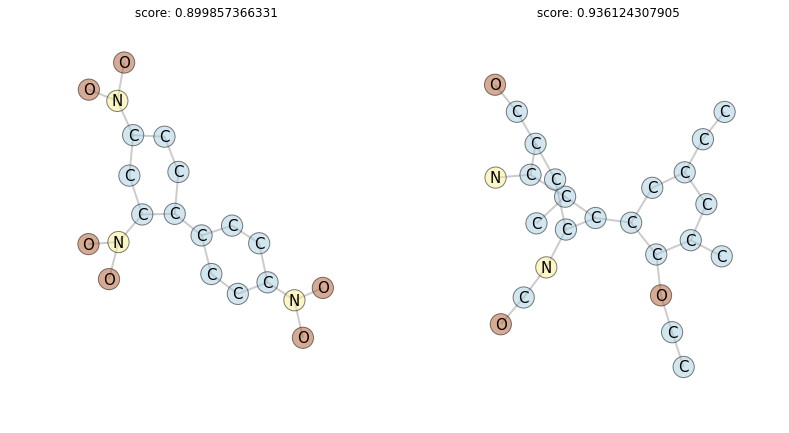

11 5
flow: 1.058480
_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0
20 3
flow: 1.025157
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  2
20 3
flow: 1.025157
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0
23 45
flow: 0.660787
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0
8 21
flow: 0.800443
_propose_graph: iteration 4 ; core 0 of 16 ; original_cips tried  0
50 15
flow: 1.080000
_propose_graph: iteration 5 ; core 0 of 14 ; original_cips tried  0
55 62
flow: 0.854690
_propose_graph: iteration 6 ; core 0 of 2 ; original_cips tried  0
21 21
flow: 1.166667
_propose_graph: iteration 7 ; core 0 of 4 ; original_cips tried  0
21 21
flow: 1.000000
_propose_graph: iteration 8 ; core 0 of 4 ; original_cips tried  0
23 21
flow: 0.851133
_propose_graph: iteration 9 ; core 0 of 4 ; original_cips tried  0
60 60
flow: 0.833333
_propose_graph: iteration 10 ; core 0 of 4 ; original_cips tried  0
80 55
flow: 1.612903
_propose_gra

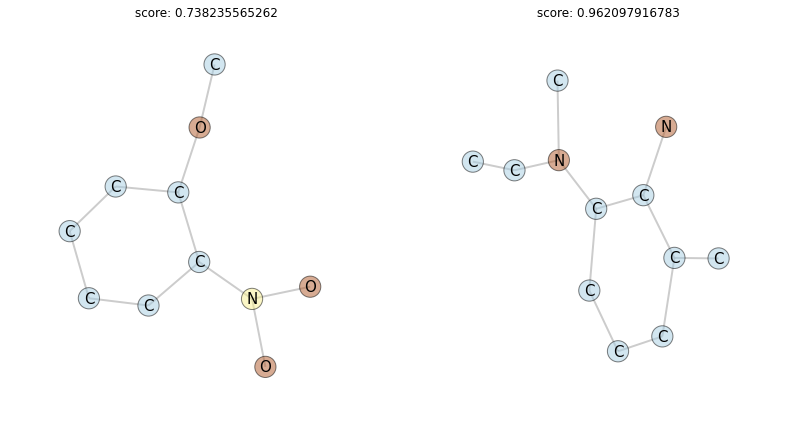

34 34
flow: 1.125000
_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0
47 39
flow: 1.047619
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0
16 11
flow: 1.136691
_propose_graph: iteration 2 ; core 0 of 7 ; original_cips tried  0
21 44
flow: 0.972296
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0
16 11
flow: 1.124590
_propose_graph: iteration 4 ; core 0 of 7 ; original_cips tried  0
44 23
flow: 1.065736
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0
23 44
flow: 0.938319
_propose_graph: iteration 6 ; core 0 of 7 ; original_cips tried  0
36 24
flow: 1.030651
_propose_graph: iteration 7 ; core 0 of 14 ; original_cips tried  0
21 3
flow: 1.009302
_propose_graph: iteration 8 ; core 0 of 7 ; original_cips tried  0
6 11
flow: 1.010753
_propose_graph: iteration 9 ; core 0 of 2 ; original_cips tried  0
8 8
flow: 1.000000
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0
4 8
flow: 1.012195
_propose_graph:

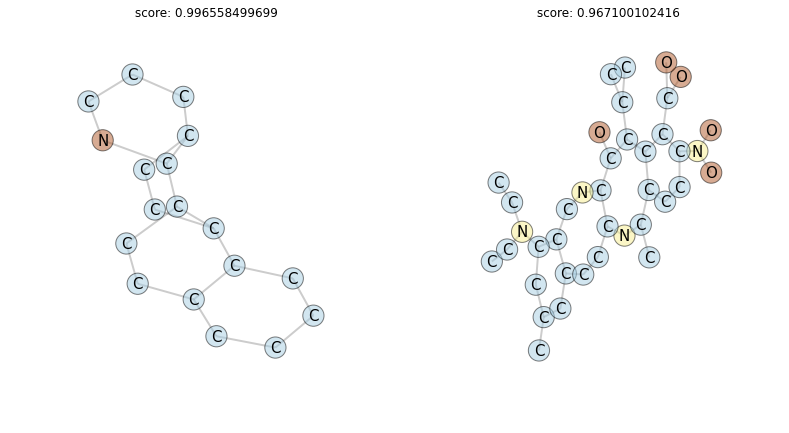

39 21
flow: 1.109533
_propose_graph: iteration 0 ; core 0 of 14 ; original_cips tried  0
15 18
flow: 1.039735
_propose_graph: iteration 1 ; core 0 of 5 ; original_cips tried  0
18 23
flow: 1.004365
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0
16 12
flow: 1.067358
_propose_graph: iteration 3 ; core 0 of 5 ; original_cips tried  0
16 16
flow: 1.070175
_propose_graph: iteration 4 ; core 0 of 1 ; original_cips tried  0
16 16
flow: 0.934426
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0
23 18
flow: 0.995943
_propose_graph: iteration 6 ; core 0 of 2 ; original_cips tried  0
19 11
flow: 0.991150
_propose_graph: iteration 7 ; core 0 of 7 ; original_cips tried  0
8 4
flow: 1.021053
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0
20 6
flow: 1.014760
_propose_graph: iteration 9 ; core 0 of 2 ; original_cips tried  0
12 12
flow: 0.968254
_propose_graph: iteration 10 ; core 0 of 5 ; original_cips tried  0
13 27
flow: 0.881590
_propose_gra

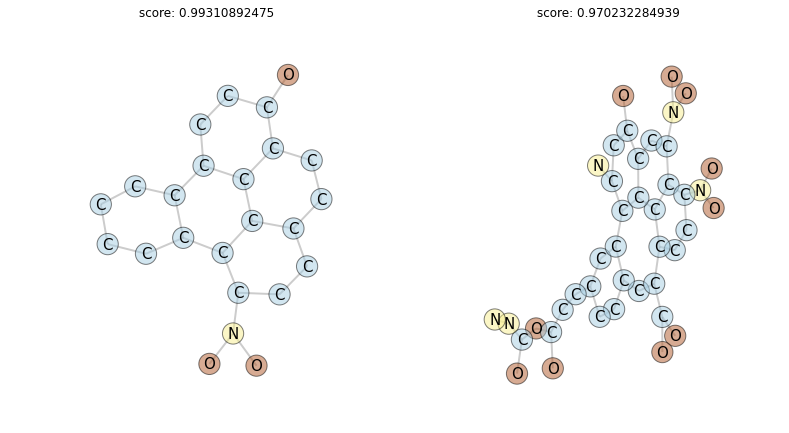

35 21
flow: 1.033573
_propose_graph: iteration 0 ; core 0 of 14 ; original_cips tried  1
5 6
flow: 1.020408
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0
15 19
flow: 1.039626
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0
18 1
flow: 0.965585
_propose_graph: iteration 3 ; core 0 of 5 ; original_cips tried  0
10 12
flow: 0.983457
_propose_graph: iteration 4 ; core 0 of 2 ; original_cips tried  0
6 14
flow: 0.933702
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0
19 18
flow: 0.999480
_propose_graph: iteration 6 ; core 0 of 3 ; original_cips tried  0
43 28
flow: 1.055107
_propose_graph: iteration 7 ; core 0 of 7 ; original_cips tried  0
14 19
flow: 1.002836
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0
32 5
flow: 0.986326
_propose_graph: iteration 9 ; core 0 of 2 ; original_cips tried  0
17 9
flow: 1.031541
_propose_graph: iteration 10 ; core 0 of 7 ; original_cips tried  0
14 3
flow: 0.988409
_propose_graph: 

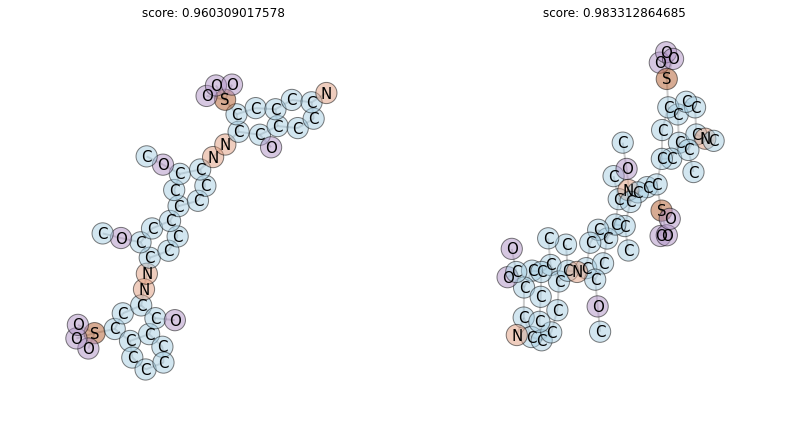

6 16
flow: 0.821656
_propose_graph: iteration 0 ; core 0 of 14 ; original_cips tried  0
24 56
flow: 0.941748
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0
41 26
flow: 1.080745
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0
15 3
flow: 1.029412
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0
12 14
flow: 1.006173
_propose_graph: iteration 4 ; core 0 of 5 ; original_cips tried  0
8 15
flow: 0.781690
_propose_graph: iteration 5 ; core 0 of 14 ; original_cips tried  0
15 8
flow: 1.279279
_propose_graph: iteration 6 ; core 0 of 14 ; original_cips tried  0
15 8
flow: 1.175676
_propose_graph: iteration 7 ; core 0 of 14 ; original_cips tried  0
3 20
flow: 0.969773
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0
7 7
flow: 1.117647
_propose_graph: iteration 9 ; core 0 of 2 ; original_cips tried  0
15 3
flow: 1.035714
_propose_graph: iteration 10 ; core 0 of 2 ; original_cips tried  0
10 24
flow: 1.042042
_propose_graph:

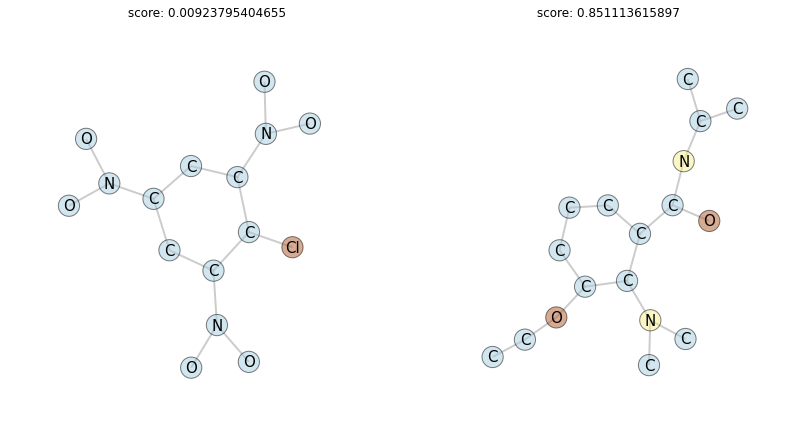

37 19
flow: 1.151668
_propose_graph: iteration 0 ; core 0 of 14 ; original_cips tried  0
15 15
flow: 0.947368
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0
41 41
flow: 1.114286
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0
11 6
flow: 1.033380
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0
36 36
flow: 0.902439
_propose_graph: iteration 4 ; core 0 of 1 ; original_cips tried  0
28 47
flow: 0.861791
_propose_graph: iteration 5 ; core 0 of 7 ; original_cips tried  0
47 28
flow: 1.160374
_propose_graph: iteration 6 ; core 0 of 7 ; original_cips tried  0
21 5
flow: 1.018939
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0
14 14
flow: 0.950000
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0
4 2
flow: 1.082645
_propose_graph: iteration 9 ; core 0 of 7 ; original_cips tried  0
4 4
flow: 1.000000
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0
2 16
flow: 0.854271
_propose_graph: 

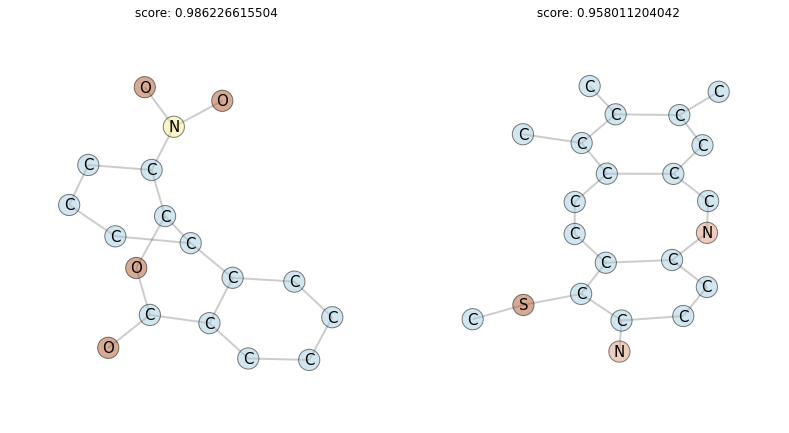

30 25
flow: 1.100239
_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0
11 16
flow: 1.008264
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0
25 26
flow: 0.909942
_propose_graph: iteration 2 ; core 0 of 5 ; original_cips tried  0
44 23
flow: 1.130058
_propose_graph: iteration 3 ; core 0 of 7 ; original_cips tried  0
18 18
flow: 1.041667
_propose_graph: iteration 4 ; core 0 of 5 ; original_cips tried  0
18 1
flow: 1.002179
_propose_graph: iteration 5 ; core 0 of 14 ; original_cips tried  0
18 18
flow: 1.000000
_propose_graph: iteration 6 ; core 0 of 5 ; original_cips tried  0
10 3
flow: 1.017910
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0
56 20
flow: 0.981946
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0
8 2
flow: 1.052239
_propose_graph: iteration 9 ; core 0 of 7 ; original_cips tried  0
2 8
flow: 0.950355
_propose_graph: iteration 10 ; core 0 of 7 ; original_cips tried  0
1 1
flow: 1.000000
_propose_graph: i

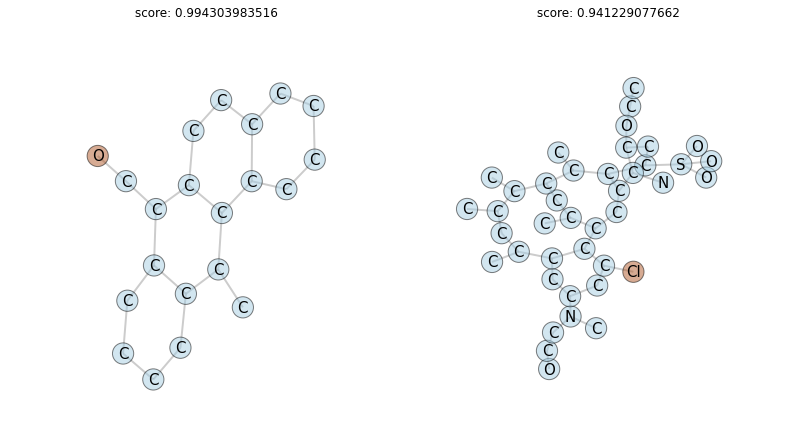

CPU times: user 53.7 s, sys: 668 ms, total: 54.4 s
Wall time: 55.5 s


In [5]:
%%time
# plot examples of sampling paths
from graphlearn.utils.draw import  graphlearn_draw, get_score_of_graph
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    graphlearn_draw(path_graphs,
                   n_graphs_per_line=6, size=7, 
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                   vertex_alpha=0.5, edge_alpha=0.2, node_size=450,
                   headlinehook=get_score_of_graph)

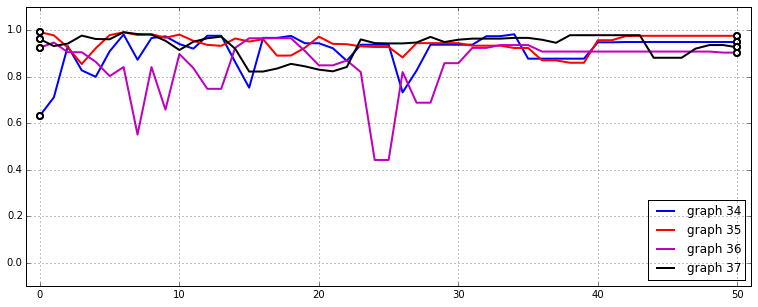

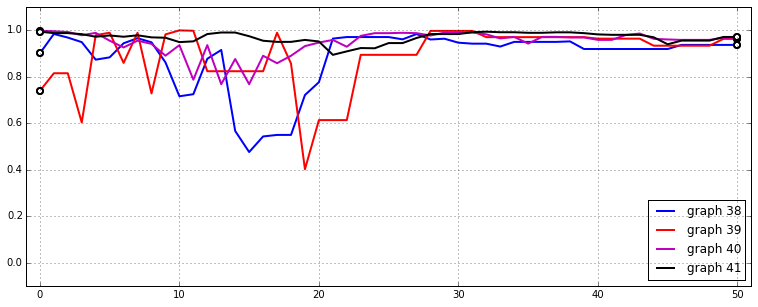

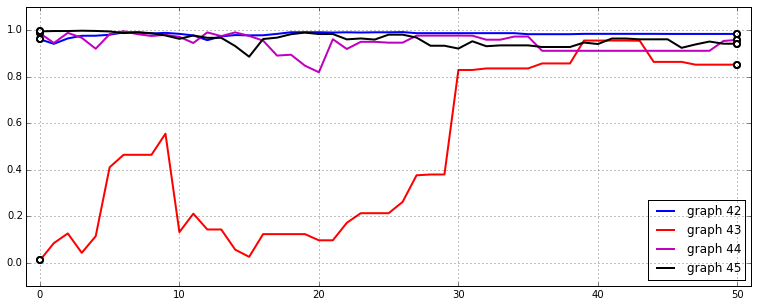

CPU times: user 804 ms, sys: 24 ms, total: 828 ms
Wall time: 835 ms


In [6]:
%%time
# plot sampling path score
from itertools import islice
import numpy as np
import pylab as plt
markevery=n_steps/(n_samples-1)
step=1
num_graphs_per_plot=4
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(13,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, linewidth=2, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
        plt.plot(data, linestyle='None',markevery=markevery, markerfacecolor='white', marker='o', markeredgewidth=2,markersize=6)
    plt.legend(loc='lower right')
    plt.grid()
    plt.xlim(-1,n_steps+1)
    plt.ylim(-0.1,1.1)
    plt.show()

.